## Initial code

In [1]:
import os
import sys


curr_dir = os.getcwd()
parent_dir = os.path.dirname(curr_dir)
sys.path.append(parent_dir)


import psutil
from utils import check_and_install
    
# List of packages to check, with any special names or setup functions
packages = [
    "pandas",
    "numpy",
    "matplotlib",
    "seaborn",
    "scikit-learn",
    "scipy",
    "tqdm",
    "pandarallel",
    "thinc",
    "srsly",
    "fastai",
    "matplotlib-venn"
]

# Loop through each package, importing and installing if needed
for package in packages:
    check_and_install(package)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from multiprocessing import Pool
from matplotlib_venn import venn3



from pandarallel import pandarallel

real_cpu_count = psutil.cpu_count(logical=False)
pandarallel.initialize(progress_bar=True)


scikit-learn not found, installing...
scikit-learn has been installed
matplotlib-venn not found, installing...
matplotlib-venn has been installed
INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
DatasetRaces = pd.read_csv("../dataset/races_filled.csv")
DatasetCyclists = pd.read_csv("../dataset/cyclists_filled.csv")

MergedDataset = pd.merge(DatasetCyclists, DatasetRaces.drop(columns=['name']), left_on='_url', right_on='cyclist', suffixes=('_cyclist', '_race')).drop(columns=['_url_cyclist']) 
del MergedDataset['race_year']

print(MergedDataset.duplicated().sum())
print(MergedDataset.isnull().sum())

MergedDataset.sample(3)


0
name                      0
birth_year                0
weight                    0
height                    0
nationality               0
expected_url              0
_url_race                 0
points                    0
uci_points                0
length                    0
climb_total               0
profile                   0
startlist_quality         0
date                      0
position                  0
cyclist                   0
cyclist_age               0
is_tarmac                 0
is_cobbled                0
is_gravel                 0
cyclist_team         158681
delta                     0
dtype: int64


,name,birth_year,weight,height,nationality,expected_url,_url_race,points,uci_points,length,...,startlist_quality,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
415693,Kim Kirchen,1978.0,68.000000,178.000000,Luxembourg,kim--kirchen,tour-de-france/2009/stage-10,0.0,0.0,194500.0,...,1557,2009-07-14 04:46:43,63,kim-kirchen,31.0,True,False,False,NaN,16.0
77835,Samuel Dumoulin,1980.0,57.000000,159.000000,France,samuel--dumoulin,dauphine/2010/stage-4,0.0,0.0,49000.0,...,673,2010-06-09 01:12:23,165,samuel-dumoulin,30.0,True,False,False,south-africa-2022,632.0
146330,Francis Castaing,1959.0,72.853836,185.803763,France,francis--castaing,tour-de-france/1985/stage-19,50.0,24.0,200000.0,...,1470,1985-07-18 05:42:13,3,francis-castaing,26.0,True,False,False,NaN,0.0


In [3]:
outliers_lof = pd.read_csv('../dataset/outliers_lof.csv')
outliers_iso_for = pd.read_csv('../dataset/outliers_iso_for.csv')
outliers_oc_svm_gpu = pd.read_csv('../dataset/outliers_oc_svm.csv')

NumericalDataset = MergedDataset.select_dtypes(include=[np.number])

normal_lof = MergedDataset[~MergedDataset['_url_race'].isin(outliers_lof['name_race'])]
normal_iso_for = MergedDataset[~MergedDataset['_url_race'].isin(outliers_iso_for['name_race'])]
normal_oc_svm = MergedDataset[~MergedDataset['_url_race'].isin(outliers_oc_svm_gpu['name_race'])]

normal_lof_num = normal_lof.select_dtypes(include=[np.number])
normal_iso_for_num = normal_iso_for.select_dtypes(include=[np.number])
normal_oc_svm_num = normal_oc_svm.select_dtypes(include=[np.number])

outliers_lof_num = outliers_lof.select_dtypes(include=[np.number])
outliers_iso_for_num = outliers_iso_for.select_dtypes(include=[np.number])
outliers_oc_svm_num = outliers_oc_svm_gpu.select_dtypes(include=[np.number])

normal_lof.sample(3)

,name,birth_year,weight,height,nationality,expected_url,_url_race,points,uci_points,length,...,startlist_quality,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
219042,Peter Sagan,1990.0,78.0,182.0,Slovakia,peter--sagan,tour-de-suisse/2014/stage-4,18.0,2.0,160400.0,...,944,2014-06-17 03:35:03,3,peter-sagan,24.0,True,False,False,chazal-vetta-mbk-1993,0.0
333773,Laurent Fignon,1960.0,67.0,174.0,France,laurent--fignon,vuelta-a-espana/1983/stage-1,0.0,0.0,235000.0,...,705,1983-04-20 06:36:47,21,laurent-fignon,23.0,True,False,False,bingoal-wb-2023,30.0
420002,Alan Marangoni,1984.0,74.0,185.0,Italy,alan--marangoni,vuelta-a-espana/2011/stage-8,0.0,0.0,183000.0,...,1170,2011-08-27 05:07:50,162,alan-marangoni,27.0,True,False,False,sport-vlaanderen-baloise-2021,1240.0


### Outliers difference

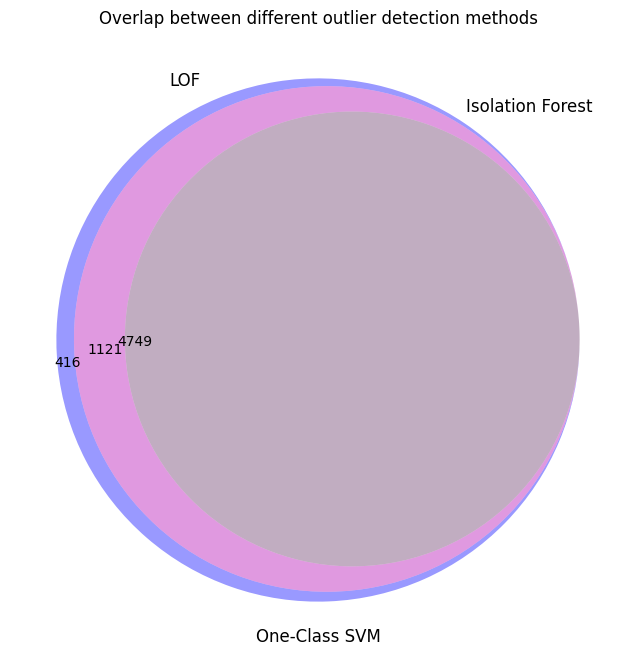

In [4]:
lof_set = set(outliers_lof.index)
iso_set = set(outliers_iso_for.index)
oc_svm_set = set(outliers_oc_svm_gpu.index)

all_outliers = lof_set | oc_svm_set | iso_set
lof_iso = lof_set & iso_set
lof_oc_svm = lof_set & oc_svm_set
iso_oc_svm = iso_set & oc_svm_set

fig = plt.figure(figsize=(15, 8))

venn3([lof_set, iso_set, oc_svm_set], 
      set_labels=('LOF', 'Isolation Forest', 'One-Class SVM'))
plt.title('Overlap between different outlier detection methods')

plt.show()
plt.close()

In [5]:
from outliers_code.outliers_analysis import print_summary_statistics

print_summary_statistics(lof_set=lof_set, iso_set=iso_set, oc_svm_set=oc_svm_set)

Summary Statistics:
Total outliers detected by LOF: 5870
Total outliers detected by Isolation Forest: 4749
Total outliers detected by OC-SVM: 6286

Intersections:
Detected by all three methods: 4749
Common between LOF and IsoForest: 4749
Common between LOF and OC-SVM: 5870
Common between IsoForest and OC-SVM: 4749


In [6]:
from outliers_code.outliers_analysis import visualize_outliers_3d

all_outliers_indexes = outliers_lof.index.union(outliers_iso_for.index).union(outliers_oc_svm_gpu.index)
fig, pca_df = visualize_outliers_3d(NumericalDataset.loc[all_outliers_indexes], lof_set, iso_set, oc_svm_set)
fig.show()
plt.close()

## Outliers analysis

Since each run of the algorithms might produce different parameters and different outliers, we will use the outliers generated by the main notebook.

### Z-scores, box plots

In [5]:
from outliers_code.outliers_analysis import (
    calculate_z_score, 
    plot_outlier_scores, 
    plot_z_score_distributions,    
)

NumericalDataset = normal_lof.select_dtypes(include=[np.number])
stats = NumericalDataset.agg(['mean', 'std'])
data_mean, data_std = stats.loc['mean'], stats.loc['std']



data_tuples = [
    (outliers_lof[NumericalDataset.columns], data_mean, data_std),
    (outliers_iso_for[NumericalDataset.columns], data_mean, data_std),
    (outliers_oc_svm_gpu[NumericalDataset.columns], data_mean, data_std)
]
with Pool() as pool:
    z_scores = pool.map(calculate_z_score, data_tuples)

z_scores_lof, z_scores_iso_for, z_scores_oc_svm = z_scores



#### Histogram plots of outliers z-scores

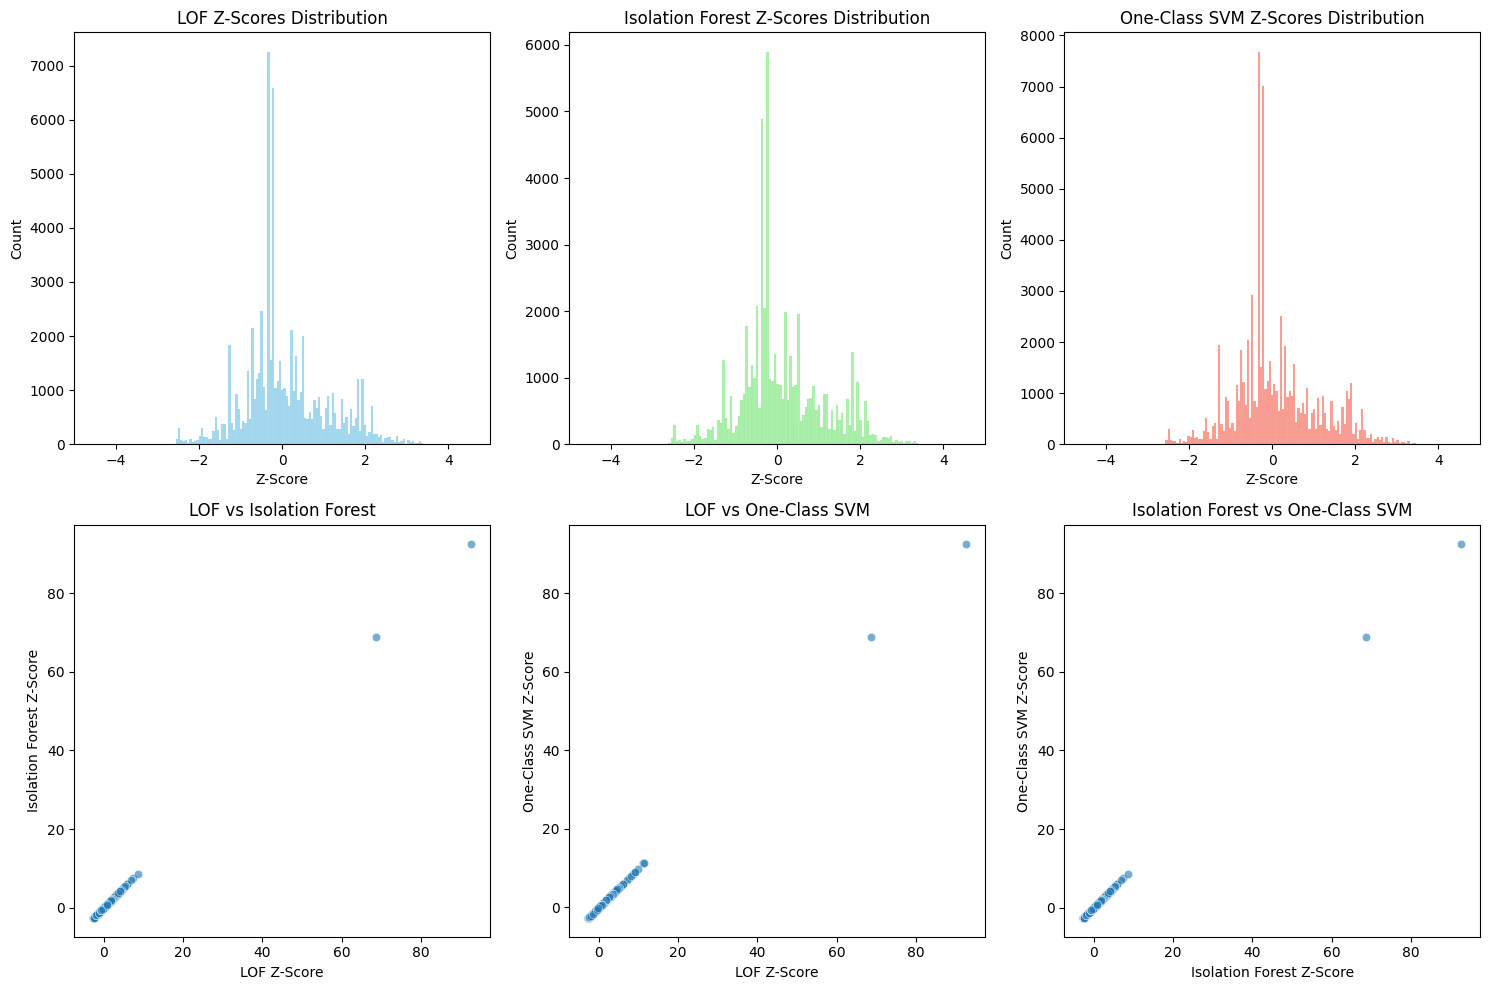

In [6]:
plot_outlier_scores(z_scores_lof, z_scores_iso_for, z_scores_oc_svm)

#### Box plots of outliers z-scores

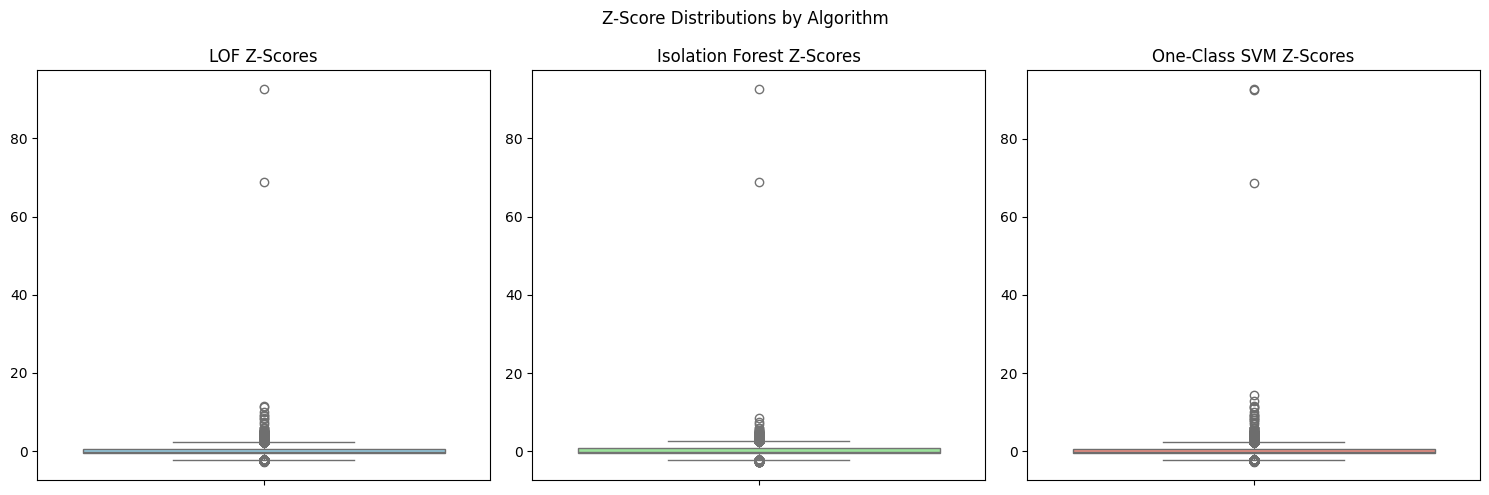

In [7]:
z_scores_dict = {
    "LOF": z_scores_lof,
    "Isolation Forest": z_scores_iso_for,
    "One-Class SVM": z_scores_oc_svm
}

plot_z_score_distributions(z_scores_dict)

### KDE plots

/home/lesi-nedo/Desktop/master/second-year/first-semester/DM/DataMining-unipi-24-25-O/outliers_code/outliers_analysis.py:135: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=inliers, ax=ax, label='Inliers', color='blue', bw_adjust=0.5)


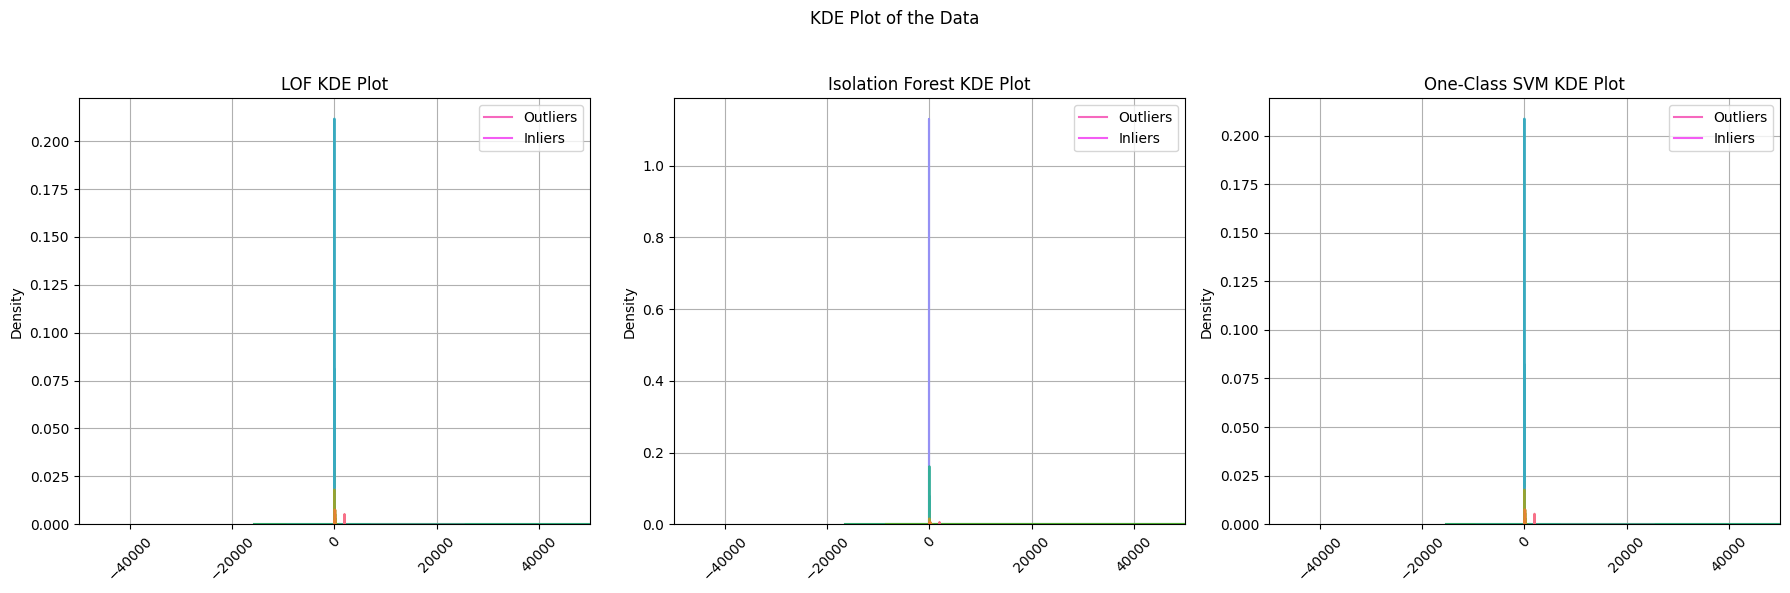

In [8]:
from outliers_code.outliers_analysis import plot_kdes

df_dicts = {
    'LOF': (outliers_lof_num,normal_lof_num),
    'Isolation Forest': (outliers_iso_for_num, normal_iso_for),
    'One-Class SVM': (outliers_oc_svm_num, normal_oc_svm_num)
}
plot_kdes(df_dicts)